# Step 1: Upload & Load Dataset



In [13]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Inspect first rows
print(df.head())

# Info and null values
print(df.info())
print(df.isnull().sum())

# Basic statistics
print(df.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape


Churn value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


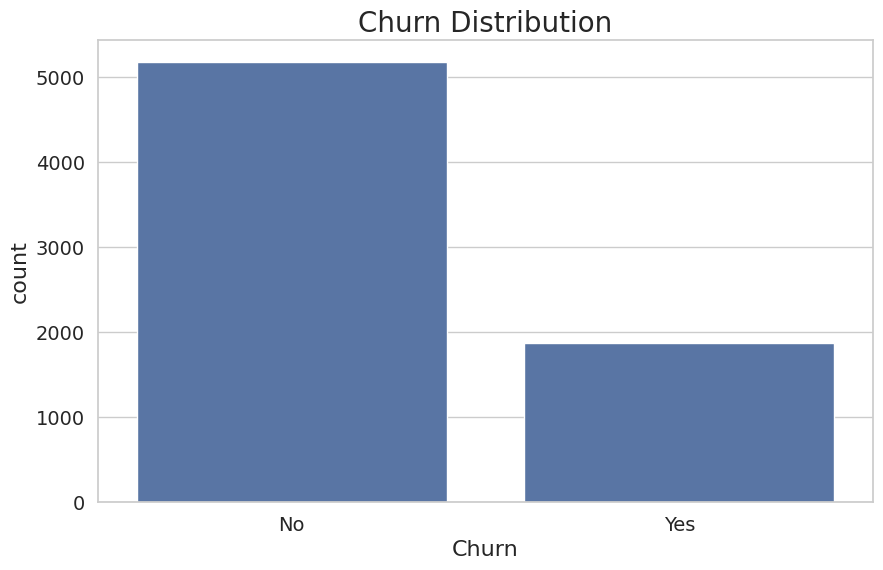

In [15]:

# 5️⃣ Check target variable distribution
if 'Churn' in df.columns:
    print("\nChurn value counts:")
    print(df['Churn'].value_counts())

    sns.countplot(x='Churn', data=df)
    plt.title("Churn Distribution")
    plt.show()
else:
    print("\nWarning: 'Churn' column not found in dataset.")

#Step 2: Data Cleaning & Preprocessing

In [16]:
#2.1 Check & handle missing / wrong values

# Convert 'TotalCharges' to numeric (sometimes it may have spaces or wrong data)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill any missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Confirm no missing values remain
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-2168641804.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [17]:
# 2.2 Encode categorical variables
# ML models need numbers, so we convert categorical columns


# Convert target variable 'Churn' to 0/1
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

# Drop 'customerID' as it's not useful for prediction
df = df.drop('customerID', axis=1)

# One-hot encode other categorical columns (convert Yes/No, PaymentMethod, Contract, etc.)
df = pd.get_dummies(df, drop_first=True)

print("Columns after encoding:")
print(df.columns)


Columns after encoding:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [18]:
# 2.3 Split features and target

# Features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']


In [19]:
# 2.4 Train-Test Split

from sklearn.model_selection import train_test_split

# Split 80% train, 20% test, keep class balance with stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 5634, Test samples: 1409


# Step 3: Professional EDA

In [20]:
# Step 3: Exploratory Data Analysis

# Set a professional style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14




/tmp/ipython-input-4212750315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


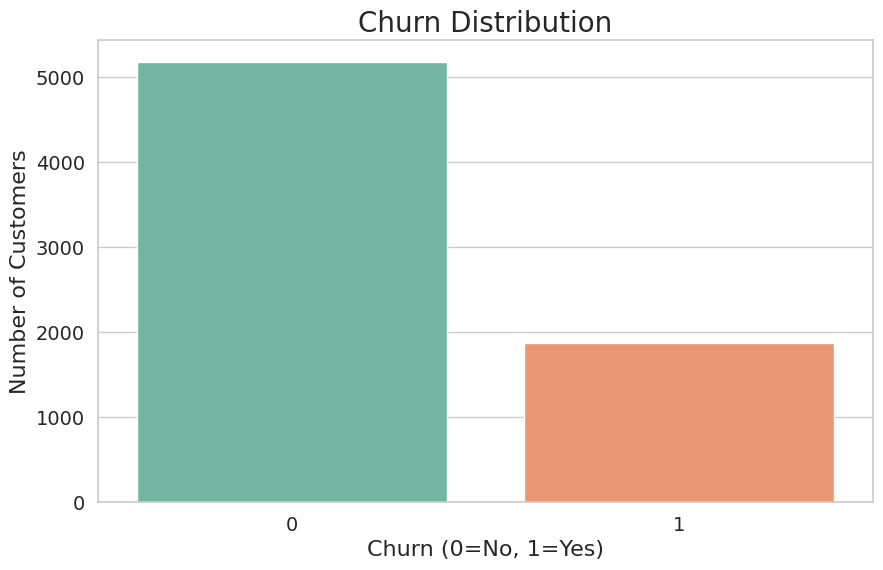

In [21]:
# 1️⃣ Target Distribution
plt.figure()
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Number of Customers")
plt.show()

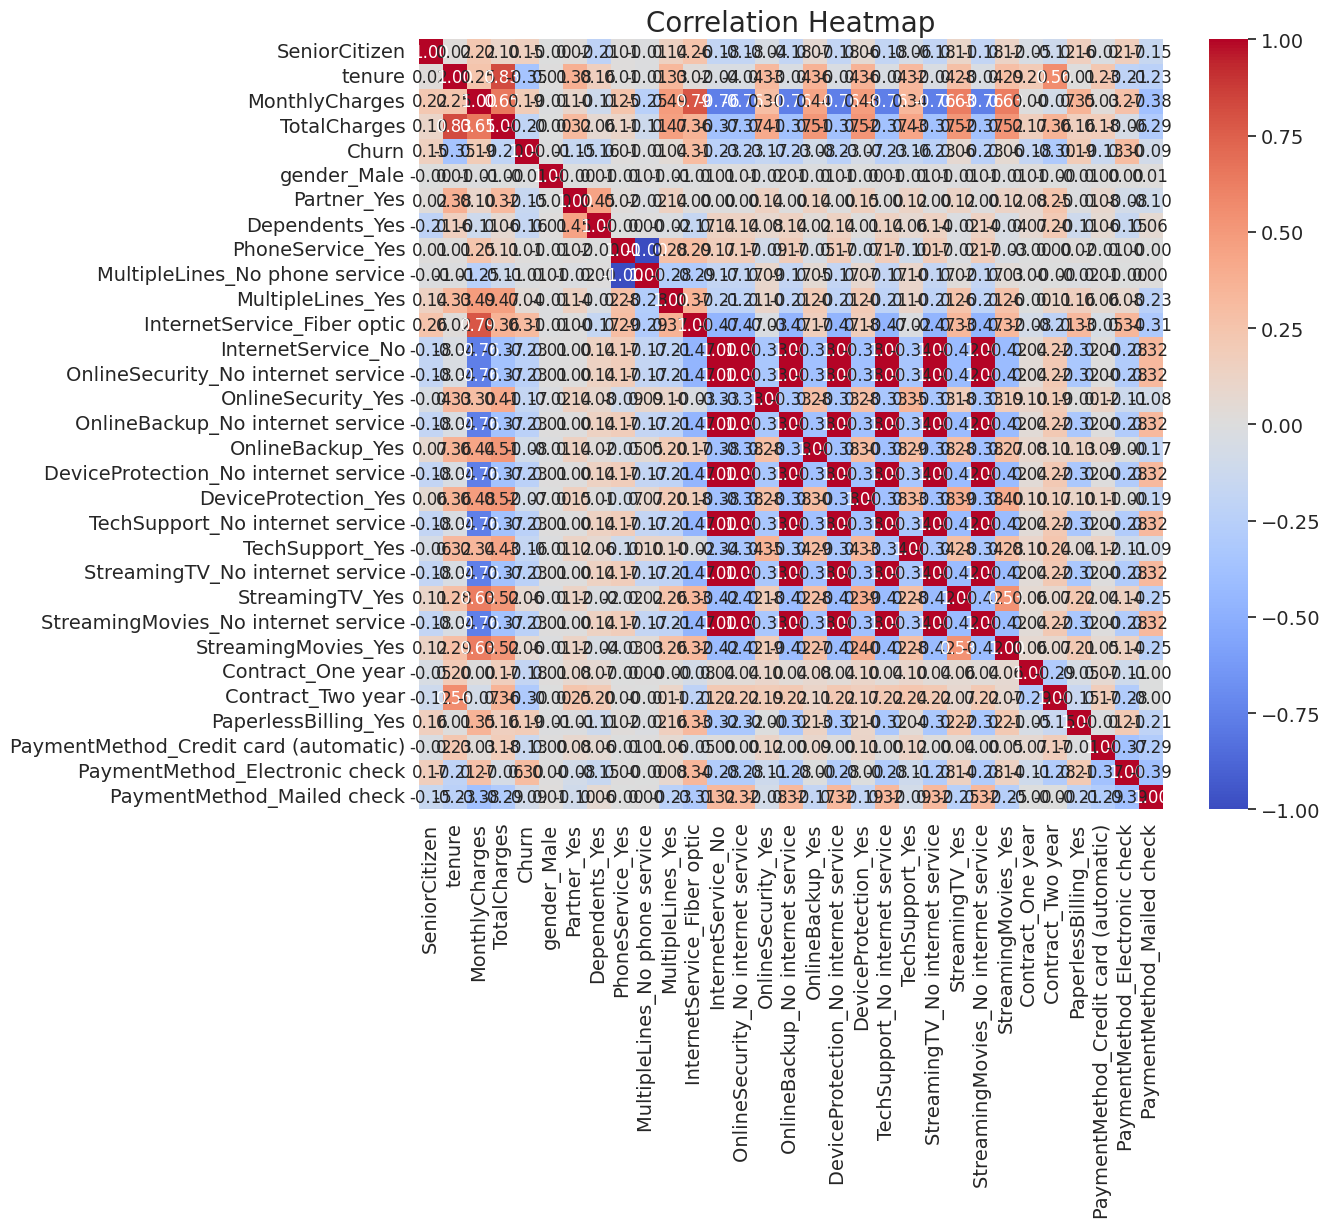

In [22]:
# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-2936410303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette='Set3')


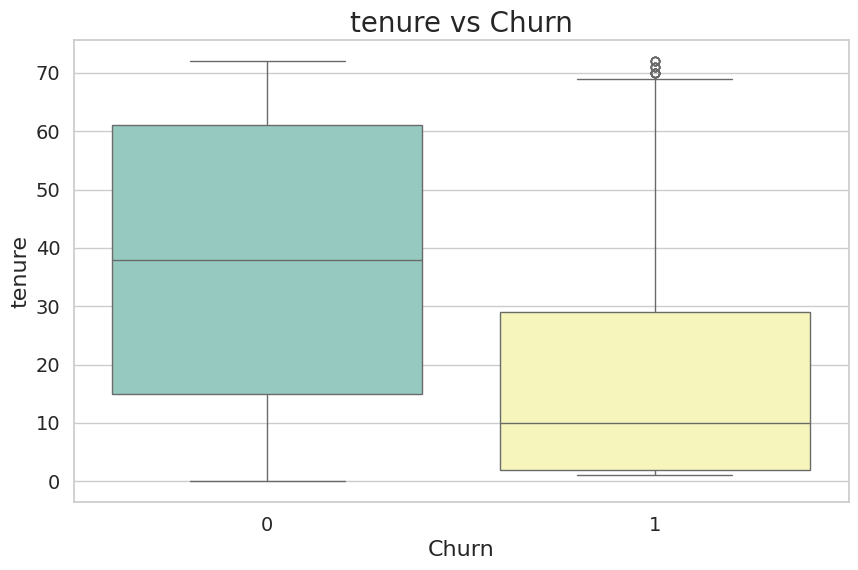

/tmp/ipython-input-2936410303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette='Set3')


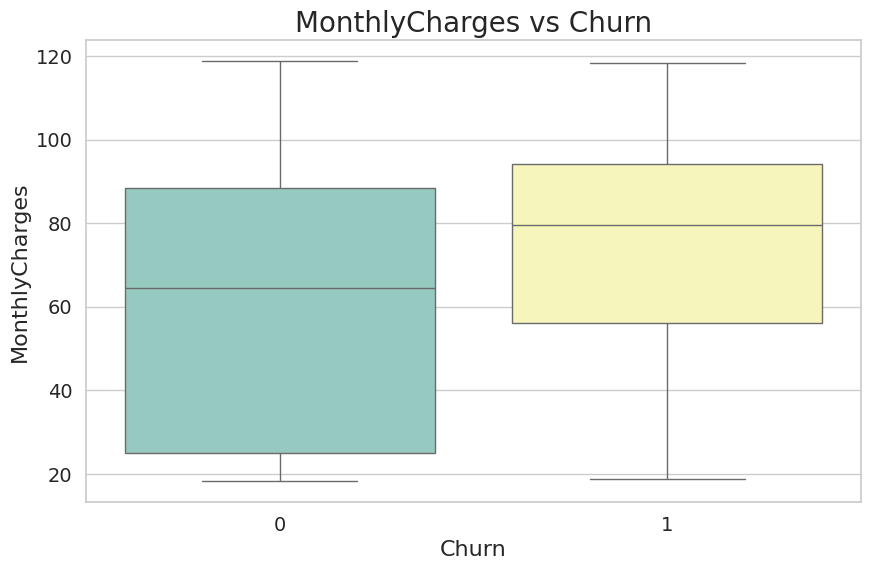

/tmp/ipython-input-2936410303.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df, palette='Set3')


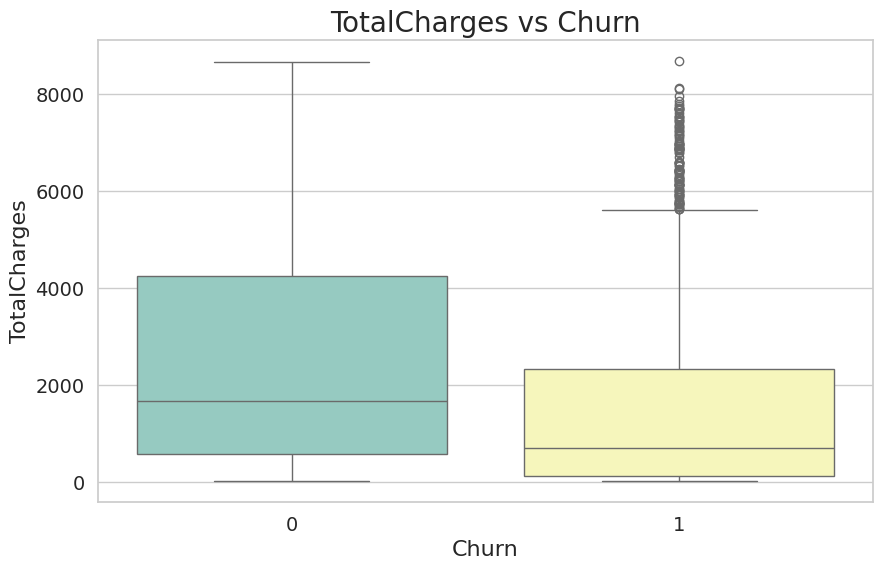

In [23]:
# 3️⃣ Boxplots for numeric features vs Churn
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numeric_features:
    plt.figure()
    sns.boxplot(x='Churn', y=feature, data=df, palette='Set3')
    plt.title(f"{feature} vs Churn")
    plt.show()

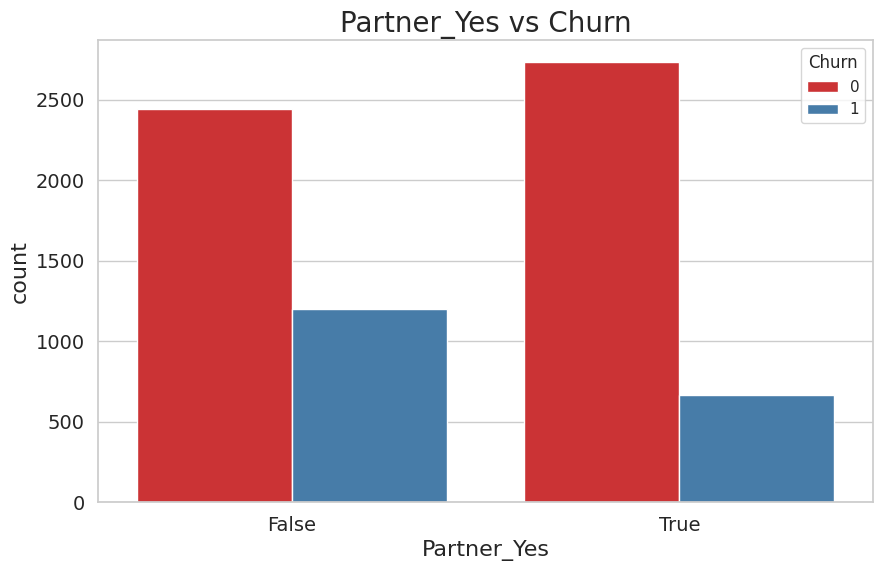

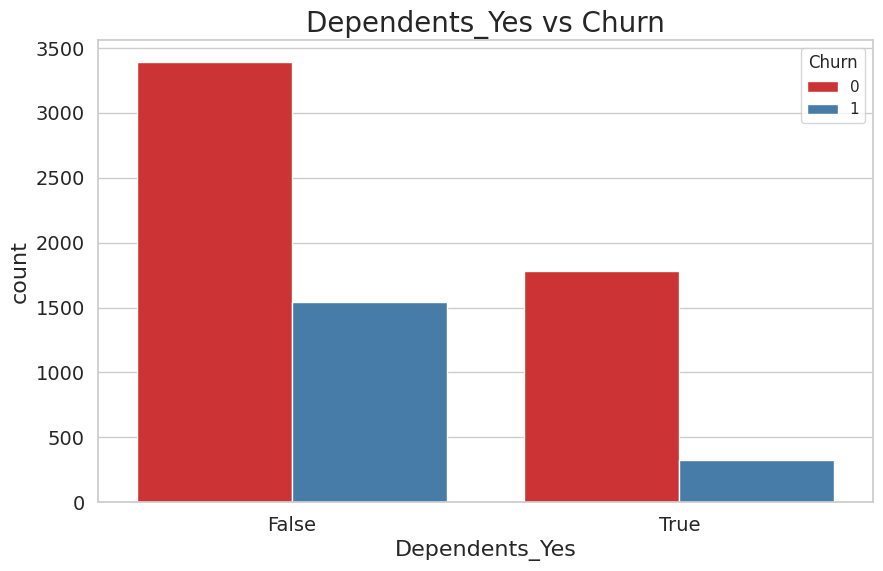

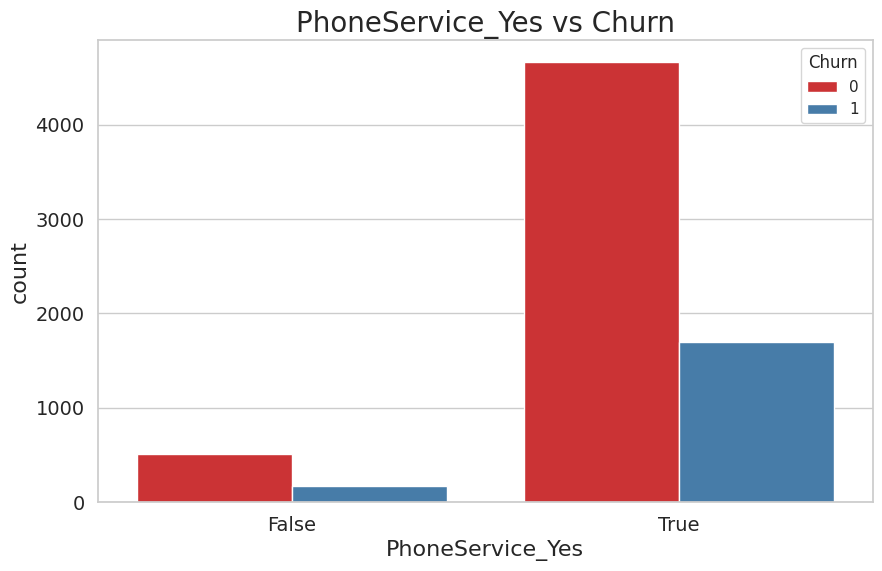

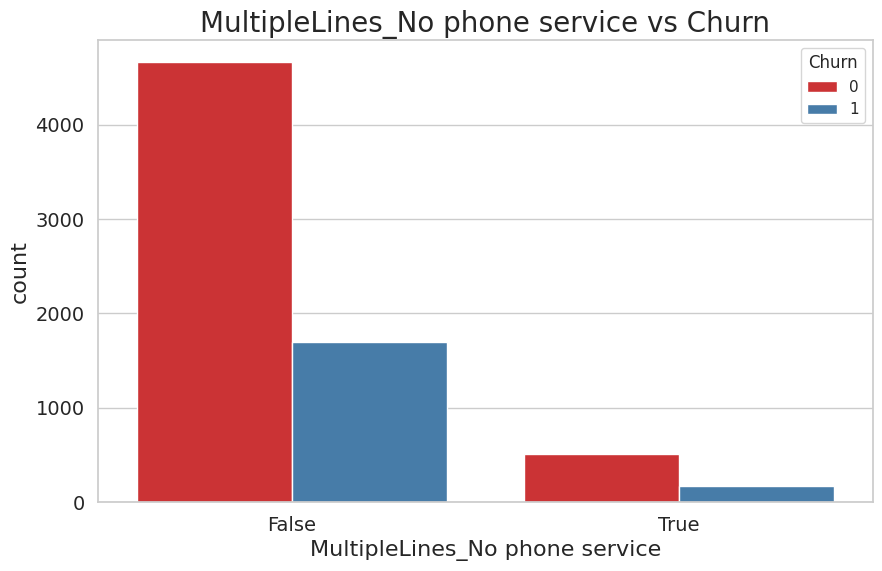

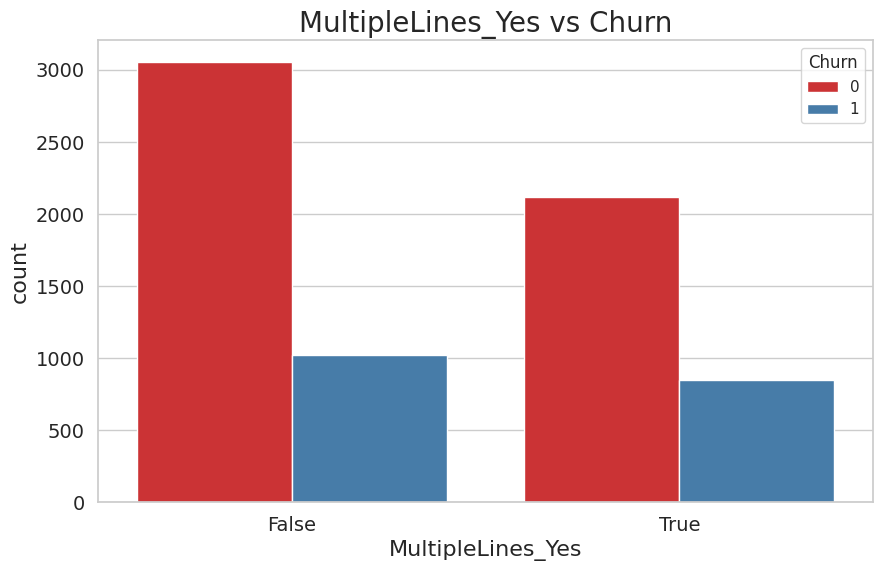

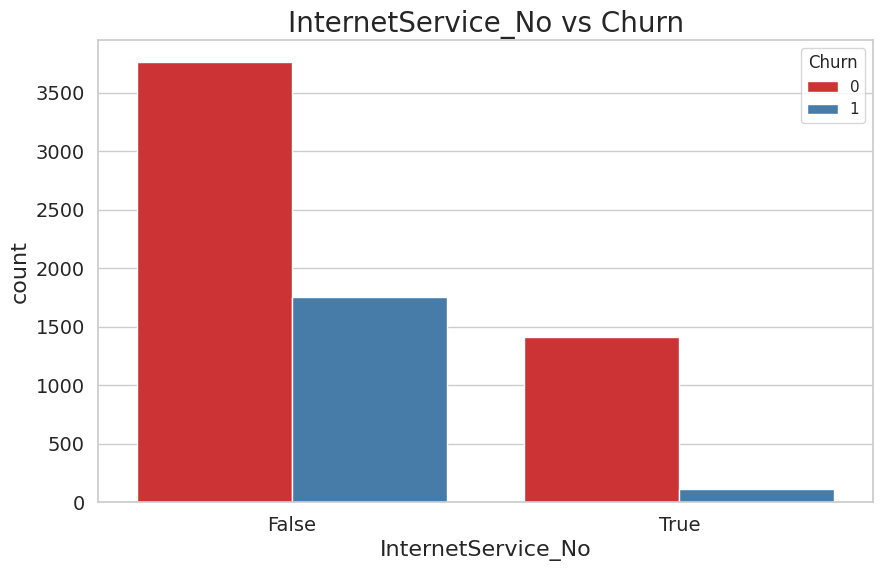

In [24]:
# 4️⃣ Barplots for categorical features vs Churn
categorical_features = [col for col in df.columns if "_Yes" in col or "_No" in col or df[col].dtype=='uint8']
for feature in categorical_features[:6]:  # show first 6 for brevity
    plt.figure()
    sns.countplot(x=feature, hue='Churn', data=df, palette='Set1')
    plt.title(f"{feature} vs Churn")
    plt.show()

# Step 4: Model Training & Evaluation

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----- Logistic Regression -----
Accuracy: 0.8034
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



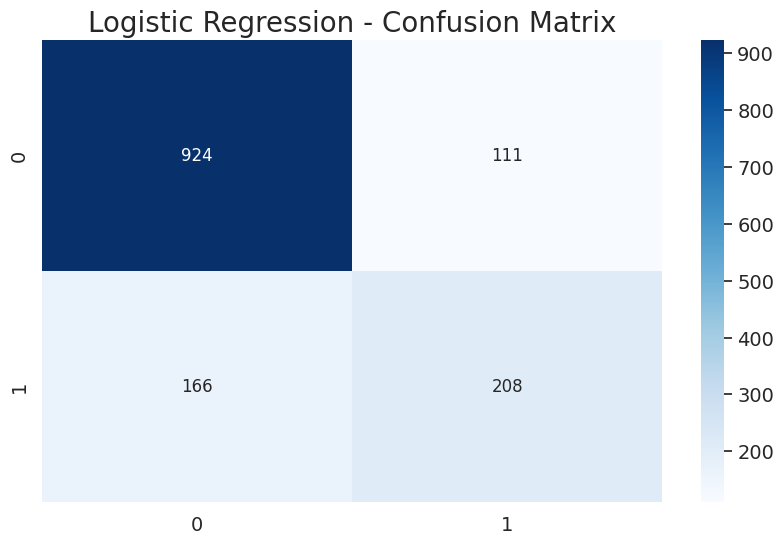

ROC-AUC: 0.8425




In [25]:
# Step 4: Model Training & Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1️⃣ Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("----- Logistic Regression -----")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_lr), 4))
print("\n")



----- Random Forest -----
Accuracy: 0.7864
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.77      0.79      0.78      1409



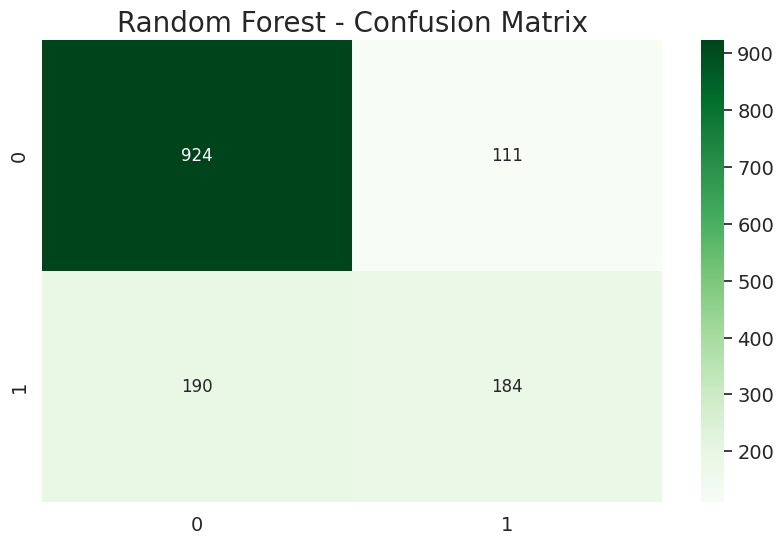

ROC-AUC: 0.8251




In [26]:

# 2️⃣ Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("----- Random Forest -----")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()

print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_rf), 4))
print("\n")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:40:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


----- XGBoost -----
Accuracy: 0.785
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.53      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



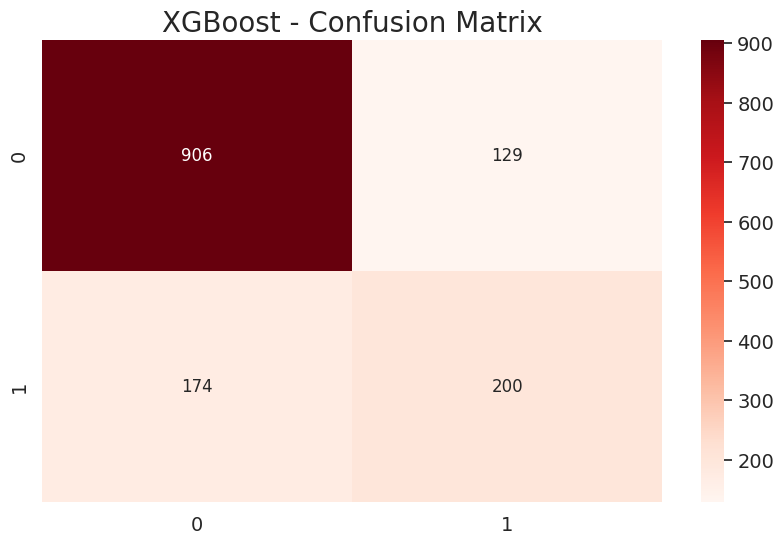

ROC-AUC: 0.8214


In [27]:

# 3️⃣ XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

print("----- XGBoost -----")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Reds')
plt.title("XGBoost - Confusion Matrix")
plt.show()

print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_xgb), 4))

# Step 5: Feature Importance & Insights

/tmp/ipython-input-1082784223.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


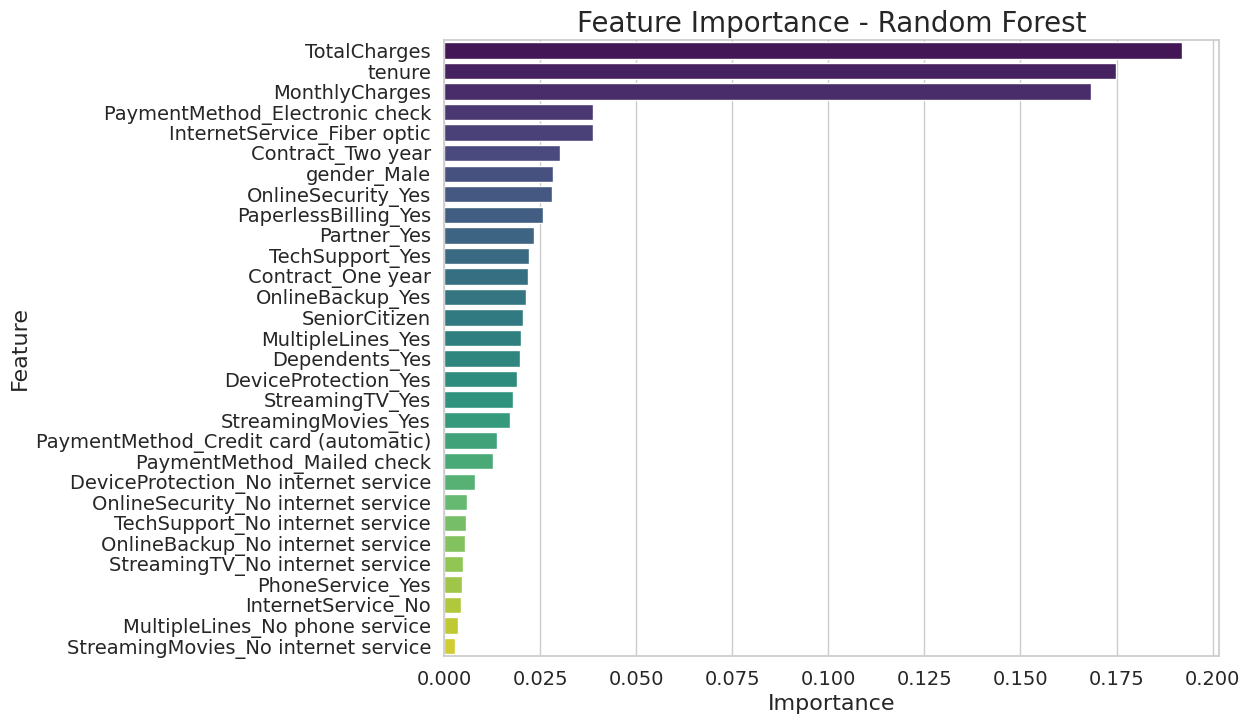

Top 10 features influencing churn:


,Feature,Importance
3,TotalCharges,0.192096
1,tenure,0.174733
2,MonthlyCharges,0.168413
28,PaymentMethod_Electronic check,0.038771
10,InternetService_Fiber optic,0.038641
25,Contract_Two year,0.030176
4,gender_Male,0.028321
13,OnlineSecurity_Yes,0.028191
26,PaperlessBilling_Yes,0.025617
5,Partner_Yes,0.023326


In [28]:
# Step 5: Feature Importance

# 1️⃣ Random Forest Feature Importance
rf_importances = rf.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title("Feature Importance - Random Forest", fontsize=20)
plt.xlabel("Importance", fontsize=16)
plt.ylabel("Feature", fontsize=16)
plt.show()

# Optional: Top 10 features
print("Top 10 features influencing churn:")
display(feat_df.head(10))


# Step 6: Model Optimization

In [29]:
# 6.1 Handle Class Imbalance (Optional but recommended)

print("Churn value counts in training set:")
print(y_train.value_counts())


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE, class distribution:")
print(y_train_res.value_counts())


Churn value counts in training set:
Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE, class distribution:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [30]:
# 6.2 Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearch
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc'
)

# Fit on resampled training data
grid_rf.fit(X_train_res, y_train_res)

# Best parameters & best score
print("Best Parameters:", grid_rf.best_params_)
print("Best ROC-AUC Score:", round(grid_rf.best_score_, 4))


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC-AUC Score: 0.9252


Accuracy: 0.775
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.57      0.60      0.58       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



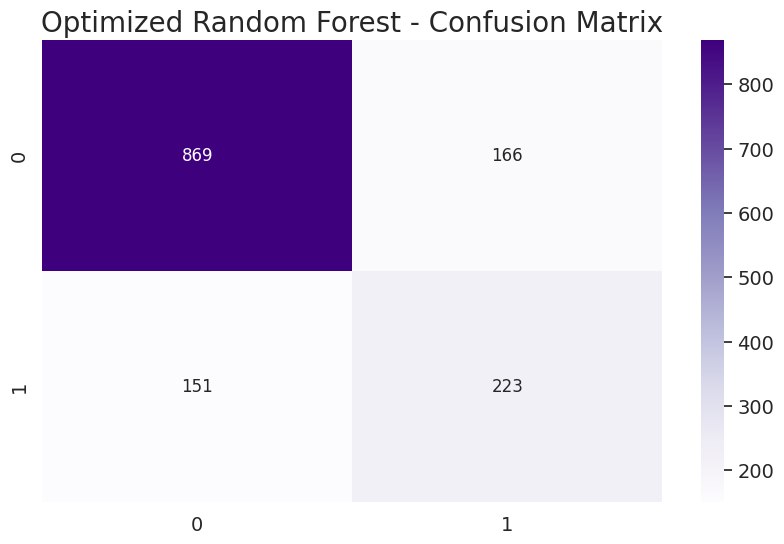

ROC-AUC: 0.8221


In [31]:
# 6.3 Evaluate Optimized Model

# Use the best estimator
best_rf = grid_rf.best_estimator_

y_pred_opt = best_rf.predict(X_test)
y_prob_opt = best_rf.predict_proba(X_test)[:,1]

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", round(accuracy_score(y_test, y_pred_opt), 4))
print(classification_report(y_test, y_pred_opt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_opt), annot=True, fmt='d', cmap='Purples')
plt.title("Optimized Random Forest - Confusion Matrix")
plt.show()

# ROC-AUC
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_opt), 4))


# Step 7: Save & Deploy the Model

In [34]:
# 1️⃣ Save the Trained Model :

import joblib

# Save the trained Random Forest model locally
joblib.dump(best_rf, 'best_rf_model.pkl')
print("✅ Model saved locally as best_rf_model.pkl")

✅ Model saved locally as best_rf_model.pkl


In [35]:
# 2️⃣ Load the model
loaded_model = joblib.load('best_rf_model.pkl')
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [36]:
# 3️⃣ Deploy: Predict on New Data

# A) Predict a Customer from Test Set

# Pick a customer (low-risk example)
new_customer = X_test.iloc[[0]]  # keep as DataFrame
pred = loaded_model.predict(new_customer)
prob = loaded_model.predict_proba(new_customer)[0][1]

print(f"Churn Prediction: {pred[0]} (0=No, 1=Churn)")
print(f"Churn Probability: {round(prob*100,2)}%")

# B) Predict a Custom New Customer

# Fill all features with 0 first
new_customer_data = {feat: [0] for feat in X_train.columns}

# Customize high-risk features
new_customer_data['SeniorCitizen'] = [1]
new_customer_data['tenure'] = [1]
new_customer_data['MonthlyCharges'] = [120]
new_customer_data['InternetService_Fiber optic'] = [1]

custom_df = pd.DataFrame(new_customer_data)
pred = loaded_model.predict(custom_df)
prob = loaded_model.predict_proba(custom_df)[0][1]

print(f"Churn Prediction: {pred[0]} (0=No, 1=Churn)")
print(f"Churn Probability: {round(prob*100,2)}%")




Churn Prediction: 0 (0=No, 1=Churn)
Churn Probability: 0.0%
Churn Prediction: 1 (0=No, 1=Churn)
Churn Probability: 66.48%


In [37]:
# 4️⃣ Optional: Save to Google Drive

from google.colab import drive
drive.mount('/content/drive')

# Save model to Drive
drive_path = '/content/drive/MyDrive/best_rf_model.pkl'
joblib.dump(loaded_model, drive_path)
print("✅ Model saved to Google Drive at:", drive_path)

# Load anytime
model_from_drive = joblib.load(drive_path)
print("✅ Model loaded from Google Drive!")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model saved to Google Drive at: /content/drive/MyDrive/best_rf_model.pkl
✅ Model loaded from Google Drive!
